# Ramen Ratings Data Analysis

## Introduction

### Data Source

This analysis explores a dataset of ramen ratings from various brands, countries, and styles. The data was collected from **The Ramen Rater**, a well-known source for ramen reviews. The dataset contains information about the brand, style, country of origin, and rating for each ramen product reviewed.  This dataset can be downloaded from the following url, https://www.kaggle.com/datasets/residentmario/ramen-ratings.

### Why This Data is of Interest

Ramen is a staple food in many countries, and it's ubiquitious nature has led to the creation of a wide variety of styles and flavors. Understanding consumer preferences, how different brands and countries fare in terms of ratings, and whether certain styles are consistently rated higher can be valuable insights for both consumers and producers.

### Questions and Hypotheses

In this analysis, we aim to answer the following questions to carry out both descriptive and diagnostic analysis:

1. **Which country produces the highest-rated ramen?**
   - Hypothesis: Japanese ramen brands generally receive higher ratings than brands from other countries.
2. **Do the ratings scores vary widely in this dataset?** 
- Hypothesis: There will be a wide range of scores as people tend to only give ratings if they have extreme views on either end, very negative or very positive.
3. **Who are the most and least reviewed brands? ** 
- Hypothesis: A few popular brands are rated far more than others.
4. **Which brands most consistently receive high average ratings?**
   - Hypothesis: A few popular brands will dominate the high ratings.
5. **Do the most reviewed brands also have higher ratings?**
   - Hypothesis: Brands with the most reviews have higher average ratings than Brands with fewer ratings.
6. **Does the style of ramen (e.g., cup, bowl, pack) affect its rating?**
   - Hypothesis: Ramen served in unusual styles like bottle or can will have lower ratings and traditional styles like box will have the highest ratings.


## Steps for Data Analysis

### 1. Import Required Libraries

First, we need to import the necessary Python libraries for data manipulation, visualization, and analysis.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load and View the Dataset

Load the dataset into a Pandas DataFrame. Ensure that the data is correctly loaded and check for any initial inconsistencies.

In [41]:
df = pd.read_csv('Top_Ramen_Ratings.csv')

Let's take a peak at our dataframe...

In [42]:
df.head() #This shows the first 5 rows of the dataframe

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


Let's see how big this dataframe is.  The shape attribute will tell us how many rows and columns.

In [43]:
df.shape

(4120, 7)

### 3. Data Cleaning

#### a. Handling Missing Values

Okay, so this dataframe has **4120 rows** and **7 columns**.  Let's see how many null values there are in each column.  If there are missing values, we will have to decide how we want to deal with them, depending on what kind of data is missing and what kind of analysis we want to do with it later.

In [44]:
df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
T           4120
dtype: int64

So, **the only column with null values is the T column**. The T column has as many null values as there are rows (*that is, the T column is completely empty*) so we should drop it.

In [45]:
df.drop("T", axis='columns', inplace = True)
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75


#### b. Data Type Conversion
Let's check the data types of each of the columns, using the `.info()` method.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4120 non-null   int64 
 1   Brand     4120 non-null   object
 2   Variety   4120 non-null   object
 3   Style     4120 non-null   object
 4   Country   4120 non-null   object
 5   Stars     4120 non-null   object
dtypes: int64(1), object(5)
memory usage: 193.3+ KB


The review number is a positive whole number so it makes sense that it is an integer (int64) datatype.  

Every other column is an object datatype.  Columns that are strings or sequences of characters or otherwise mixed datatypes in one column should be object datatypes in Pandas. So, it makes sense that Brand, Variety, Style, and Country would be object datatypes as the values in these columns are words. 

But the Stars column is also an object datatype. This seems strange as it seems from the first few rows of the dataframe that the values in the Stars column are decimals or float (float64).  

**Let's take get a summary of what unique values are in the Stars column.**

In [47]:
df["Stars"].value_counts()

Stars
5          775
3.5        607
3.75       581
4          489
4.5        282
3.25       236
4.25       223
3          191
2.75       118
2          104
4.75       103
2.5        102
1.5         54
0           44
1           44
1.75        33
2.25        32
0.5         24
0.25        21
1.25        16
NR           3
Unrated      3
4.25/5       2
1.1          2
0.75         2
3.1          2
2.9          2
2.8          2
4.125        2
4.5/5        1
5/5          1
4/4          1
3.5/2.5      1
NS           1
2.1          1
3.50         1
5/2.5        1
5/4          1
3.125        1
0.9          1
2.125        1
0.1          1
3.7          1
3.4          1
3.6          1
2.85         1
2.3          1
3.2          1
3.65         1
1.8          1
Name: count, dtype: int64

*If you can't see the whole list, view it as a scrollable element.*
From this we can see that there are `NR` and `Unrated` and `NS` values in this row. There are 3 of each of the `NR` and `Unrated` and 1 `NS`.  **Let's inspect more closely to check that none of these seem like duplicates.**

In [48]:
# Filtering for rows where the rating in the Stars column  is either NR or Unrated or NS
no_Stars_mask = (df["Stars"] == "NR") | (df["Stars"] == "Unrated") | (df["Stars"] == "NS")
df_No_Rating_Rows = df[no_Stars_mask]
df_No_Rating_Rows

,Review #,Brand,Variety,Style,Country,Stars
687,3433,Base Foods,Base Noodles,Pack,United States,NS
970,3150,Hakubaku,Baby Somen,Pack,Japan,NR
971,3149,Hakubaku,Baby Udon,Pack,Japan,NR
1479,2641,Nanoblock,Ramen Bokki,Pack,Japan,NR
1572,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated
1662,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated
2533,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated


Well, it seems these were not duplicates.  Each is a different kind of Ramen.  But without the number of stars, the remaining information about these ramens is not very helpful to our analysis.  **So, let's just filter these rows from our dataframe.**

In [49]:
df = df[~no_Stars_mask] # This takes all the rows that don't match the conditions of the mask.
df.shape

(4113, 6)

We still cannot convert this to a float yet. If we tried to then we would get an error saying there is still text in this column that cannot be converted to a float because several of the ratings are written as a fraction.

Let's use the `.str.replace()` method to change these from fractions.

In [50]:
# Use regex to remove '/' and anything that follows in the 'Stars' column
df['Stars'] = df['Stars'].str.replace(r'/.*', '', regex=True)

**Explanation of the Regular Expression `r'/\d+$'`:**

`str.replace(r'/.*', '', regex=True)`: This regular expression finds the `/` symbol and everything that follows it in each entry of the `Stars` column and replaces it with an empty string (i.e., it removes the entire fraction part).

Okay, let's do another value counts.

In [51]:
df["Stars"].value_counts()

Stars
5        778
3.5      608
3.75     581
4        490
4.5      283
3.25     236
4.25     225
3        191
2.75     118
2        104
4.75     103
2.5      102
1.5       54
0         44
1         44
1.75      33
2.25      32
0.5       24
0.25      21
1.25      16
0.75       2
1.1        2
4.125      2
3.1        2
2.8        2
2.9        2
2.1        1
3.50       1
3.125      1
0.9        1
2.125      1
0.1        1
3.7        1
3.4        1
3.6        1
2.85       1
2.3        1
3.2        1
3.65       1
1.8        1
Name: count, dtype: int64

Looks like there aren't any more non-numerical values so we can convert this to float now without losing any information.

In [52]:
df['Stars'] = pd.to_numeric(df['Stars'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4113 entries, 0 to 4119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4113 non-null   int64  
 1   Brand     4113 non-null   object 
 2   Variety   4113 non-null   object 
 3   Style     4113 non-null   object 
 4   Country   4113 non-null   object 
 5   Stars     4113 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 224.9+ KB


#### c. Data Validation

Let's now check that all rows have valid data entries and don't include ratings that do not make sense for this context(e.g., negative values, extremely high values). We are only interested in including ratings 0-5 inclusive.

In [53]:
df = df[(df['Stars'] >= 0) & (df['Stars'] <= 5)]
df.shape

(4113, 6)

### 4. Data Transformation

#### a. Normalize Country Names

Sometimes country names might appear in different forms (e.g., 'USA' and 'United States'). Let's normalize the country names for consistency.

In [54]:
# Identify potential country names that need to be consolidated
# First, let's check for similar country names by sorting them alphabetically
unique_countries_sorted = sorted(df['Country'].unique())
unique_countries_sorted

['Australia',
 'Bangladesh',
 'Brazil',
 'Cambodia',
 'Canada',
 'China',
 'Colombia',
 'Dubai',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Holland',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Malaysia',
 'Mexico',
 'Myanmar',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Pakistan',
 'Peru',
 'Philippines',
 'Phlippines',
 'Poland',
 'Portugal',
 'Russia',
 'Russian Federation',
 'Sarawak',
 'Serbia',
 'Singapore',
 'Souh Korea',
 'South Korea',
 'Spain',
 'Sweden',
 'Taiwan',
 'Thailand',
 'UK',
 'USA',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Vietnam']

Looking carefully over this list, we see that there are not only country names in different valid forms like `Holland` and `Netherlands`, but also misspellings like `Souh Korea` and `Phlippines`, and Sarawak is a state of Malaysia so for the purpose of our country level analysis, it makes sense to group it in with the other Malaysian data. 

In [55]:
# Create a mapping for making country names more uniform
countries = {
    'Holland': 'Netherlands',
    'Phlippines': 'Philippines',
    'Russian Federation': 'Russia',
    'Souh Korea': 'South Korea',
    'Sarawak': 'Malaysia',
    'UK': 'United Kingdom',
    'USA': 'United States'
}

# Replace the country names using the mapping
df["Country"] = df["Country"].replace(countries)

In [56]:
df["Country"].value_counts()

Country
Japan             797
United States     570
South Korea       428
Taiwan            405
China             286
Thailand          233
Malaysia          230
Hong Kong         205
Indonesia         175
Singapore         144
Vietnam           129
United Kingdom     77
Canada             56
Philippines        54
India              46
Germany            38
Mexico             32
Australia          25
Brazil             24
Netherlands        20
Nepal              14
Myanmar            14
Pakistan           13
Bangladesh         12
Hungary             9
Russia              7
France              6
Poland              6
Colombia            6
Serbia              5
Cambodia            5
Ireland             4
Peru                4
Italy               4
Fiji                4
Finland             3
Spain               3
Israel              3
Dubai               3
Sweden              3
Ukraine             3
Ghana               2
Estonia             2
Nigeria             2
Portugal            1
Ne

Let's do the same for Brand Names, at least getting rid of misspellings and obvious alternative spellings.

In [57]:
# First, let's check for similar brand names by sorting them alphabetically
unique_brands_sorted = sorted(df['Brand'].unique())
unique_brands_sorted

['1 To 3 Noodles',
 '7 Select',
 '7 Select/Nissin',
 '7-Eleven / Nissin',
 'A-One',
 'A-Sha',
 'A-Sha Dry Noodle',
 'A1',
 'ABC',
 'ABC President',
 'Acecook',
 'Aces',
 'Adabi',
 'Ah Lai',
 'Aji-no-men',
 'Ajinatori',
 'Ajinomoto',
 'Alhami',
 'Amianda',
 'Amino',
 "Annie Chun's",
 'Ao Ba Ba',
 'Aroi',
 'Artisan',
 'Asia Gold',
 'Asian Thai Foods',
 'Assi',
 'Atomy',
 'Authentically Asian',
 'Azami',
 'Baijia',
 'Baixiang',
 'Baixiang Noodles',
 'Baltix',
 'Baman',
 'Bamee',
 'Banzai',
 'Batchelors',
 'Being Blue',
 'Best Wok',
 'Big Bon',
 'Binh Tay',
 'Blount',
 'Bon Go Jang',
 'Bonasia',
 'Boss',
 'Bowlfull',
 'Boys & Girls',
 'Buitoni',
 'Burung Layang Terbang',
 'CJ CheilJedang',
 'COCO 2.0',
 "Campbell's",
 'Canton',
 'Cao Is Starving',
 'Cap Atoom Bulan',
 'CarJEN',
 'Charming Couple',
 "Chaudhary's Wai Wai",
 'Cheetos',
 "Chef Nic's Noodles",
 'Chef Woo',
 'Chencun',
 'Chering Chang',
 'Chewy',
 'Chikara',
 'Chil Kab Farm Products',
 'Chillies Brand',
 'China Best',
 "Ching's 

Based on the list of unique brand names, there are several brand names that appear to be duplicates or slight variations of each other. Here are a few examples:

7 Select / 7 Select/Nissin / 7-Eleven / Nissin
A-Sha / A-Sha Dry Noodle
ABC / ABC President
Chorip Dong / ChoripDong
TableMark / Tablemark
Unif / Unif / Tung-I / Unif Tung-I / Unif-100
Wu Mu / Wu-Mu
World O Noodle / World O' Noodle

Some of these require a little internet searching to see if they are truly distinct or from the same brand and some are clearly misspellings or alternative spellings.  **Try to look through and find 10 or so names that we should covert so that all the ramens from one brand can be analysed together. **

Note that you have to put \ before any quotes that are part of a name or python will think that that is the end of the name.  e.g if the ramen noodle brand was called *La Fosse's* then we would have to write `'La Fosse\'s'` in our code.



In [58]:
# Here's one possible list of conversions:
brand_names_map = {
    'A-Sha Dry Noodle':'A-Sha',
    'ABC President':'ABC',
    'Baixiang Noodles':'Baixiang',
    'ChoripDong':'Chorip Dong',
    'Fantastic Noodles':'Fantastic',
    'Fashion Foods':'Fashion Food',
    'Hua Feng Noodle Expert':'Hua Feng',
    'Ichiran Ramen':'Ichiran',
    'Lau Liu tou':'Lau Liu Tou',
    'Lishan Food Manufacturing':'Lishan',
    'Mr. Lee\'s Noodles':'Mr. Lee\'s',
    'Mr. Noodle':'Mr. Noodles',
    'Nakaki Foods':'Nakaki Food',
    'Nakaki':'Nakaki Food',
    'Nissin ':'Nissin',
    'Nissin Miojo':'Nissin',
    'Nissin-Miojo':'Nissin',
    "O'taste":'O\'Taste',
    "O\'Taste":'O\'Taste',
    'Sakurai Foods':'Sakurai',
    'Samurai Ramen':'Samurai',
    'Seven&I':'Seven & I',
    'Seven & i':'Seven & I',
    'Sugakiya Foods':'Sugakiya',
    'Tablemark':'TableMark',
    'Tasty ly':'Tasty.ly',
    'Thien Houng Foods':'Thien Houng Food',
    'Three Meters Noodles':'Three Meters',
    'Tseng Noodle':'Tseng Noodles',
    'Unif / Tung-I':'Unif',
    'Unif Tung-I':'Unif',
    'Unif-100':'Unif',
    'Yamamoto Seifun':'Yamamoto',
    'Weh Lih':'Wei Lih',
    'Wu Mu':'Wu-Mu',
    'World O Noodle':'World O\' Noodle'
    }

df["Brand"] = df["Brand"].replace(brand_names_map)
unique_brands_sorted_renamed = sorted(df['Brand'].unique())
unique_brands_sorted_renamed

['1 To 3 Noodles',
 '7 Select',
 '7 Select/Nissin',
 '7-Eleven / Nissin',
 'A-One',
 'A-Sha',
 'A1',
 'ABC',
 'Acecook',
 'Aces',
 'Adabi',
 'Ah Lai',
 'Aji-no-men',
 'Ajinatori',
 'Ajinomoto',
 'Alhami',
 'Amianda',
 'Amino',
 "Annie Chun's",
 'Ao Ba Ba',
 'Aroi',
 'Artisan',
 'Asia Gold',
 'Asian Thai Foods',
 'Assi',
 'Atomy',
 'Authentically Asian',
 'Azami',
 'Baijia',
 'Baixiang',
 'Baltix',
 'Baman',
 'Bamee',
 'Banzai',
 'Batchelors',
 'Being Blue',
 'Best Wok',
 'Big Bon',
 'Binh Tay',
 'Blount',
 'Bon Go Jang',
 'Bonasia',
 'Boss',
 'Bowlfull',
 'Boys & Girls',
 'Buitoni',
 'Burung Layang Terbang',
 'CJ CheilJedang',
 'COCO 2.0',
 "Campbell's",
 'Canton',
 'Cao Is Starving',
 'Cap Atoom Bulan',
 'CarJEN',
 'Charming Couple',
 "Chaudhary's Wai Wai",
 'Cheetos',
 "Chef Nic's Noodles",
 'Chef Woo',
 'Chencun',
 'Chering Chang',
 'Chewy',
 'Chikara',
 'Chil Kab Farm Products',
 'Chillies Brand',
 'China Best',
 "Ching's Secret",
 'Chitato',
 'Chongqing Suanlabao Food Co., Ltd.',


*Whew, that was some dirty data!  That's not unusual though.*

#### b. Grouping and Aggregation

To be able to do the analysis needed to answer the questions we posed at the start, let's group data by `Country`, `Style`, and `Brand` and then calculate the mean ratings for each of those 3 subgroups.

In [59]:
country_avg = df.groupby('Country')['Stars'].mean().sort_values(ascending=False)
style_avg = df.groupby('Style')['Stars'].mean().sort_values(ascending=False)
brand_avg = df.groupby('Brand')['Stars'].mean().sort_values(ascending=False)

### 5. Data Visualization

#### a. Bar Plot of Average Ratings by Country

Okay, let's visualize the average ramen ratings by country using a bar plot so we can answer "Which country produces the highest-rated ramen?"

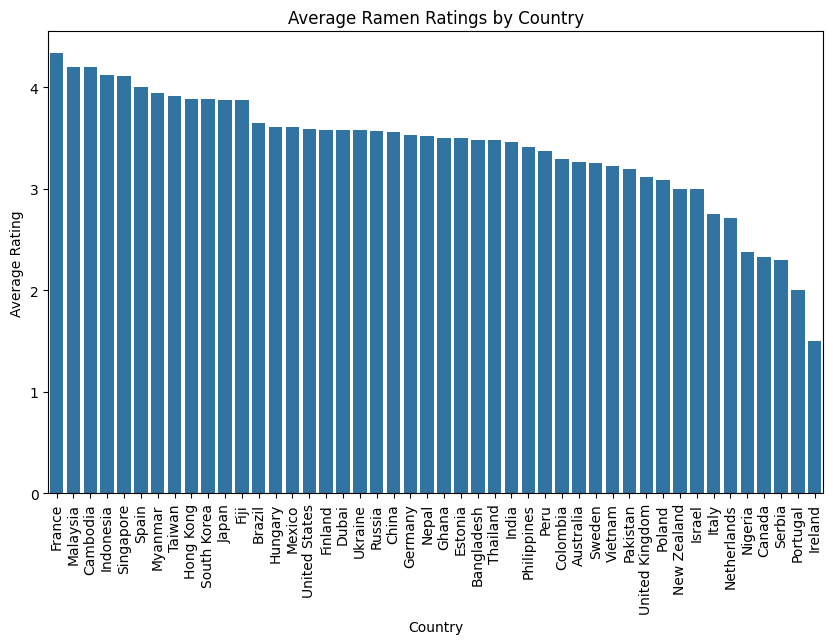

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(x=country_avg.index, y=country_avg.values)
plt.xticks(rotation=90)
plt.title('Average Ramen Ratings by Country')
plt.ylabel('Average Rating')
plt.xlabel('Country')
plt.show()

That France has the highest ratings is a bit of a surprise and warrants some further investigation.

In [108]:
# Check the number of reviews for each country
country_review_counts = df['Country'].value_counts()

# Get value for France specifically
print("Number of reviews from France:", country_review_counts.get('France', 0))


Number of reviews from France: 6


Given that France has only a few reviews, the high average rating may very likely be due to a small sample size.

In [109]:
# Filter the dataset to show only reviews from France
france_reviews = df[df['Country'] == 'France']

# Display the brands and products reviewed in France
print(france_reviews[['Brand', 'Variety', 'Stars']])


               Brand                                Variety  Stars
637          Mr. Min      Original Korean Ramen Beef Flavor   4.25
659          Mr. Min  Original Korean Ramen Instant Noodles   5.00
943  Maison de Coree                 Ramen Gout Coco Poulet   3.75
950  Maison de Coree                   Ramen Gout Carbonara   4.00
967  Maison de Coree                   Ramen Gout BBQ Coree   5.00
975  Maison de Coree                  Ramen Gout Poulet Feu   4.00


There are also just two brands reviewed in the data from France. The high average rating for France is likely due to the small sample size and the high ratings of the two brands reviewed. 

#### b. Do the ratings scores vary widely in this dataset?

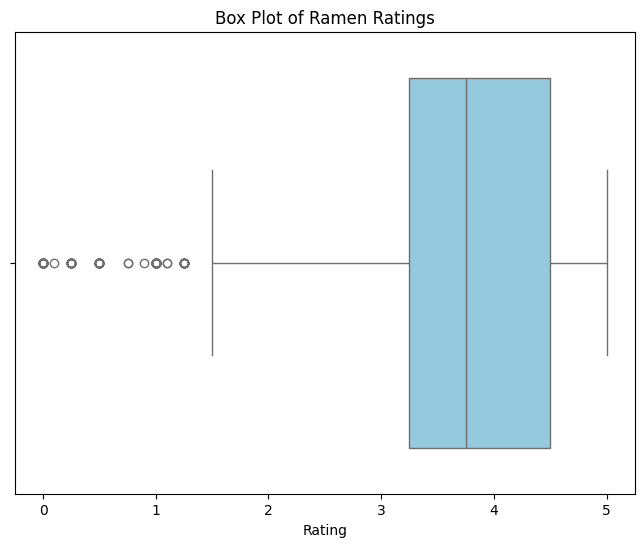

In [120]:
# Create a box plot for the 'Stars' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Stars'], color='skyblue')
plt.title('Box Plot of Ramen Ratings')
plt.xlabel('Rating')
plt.show()

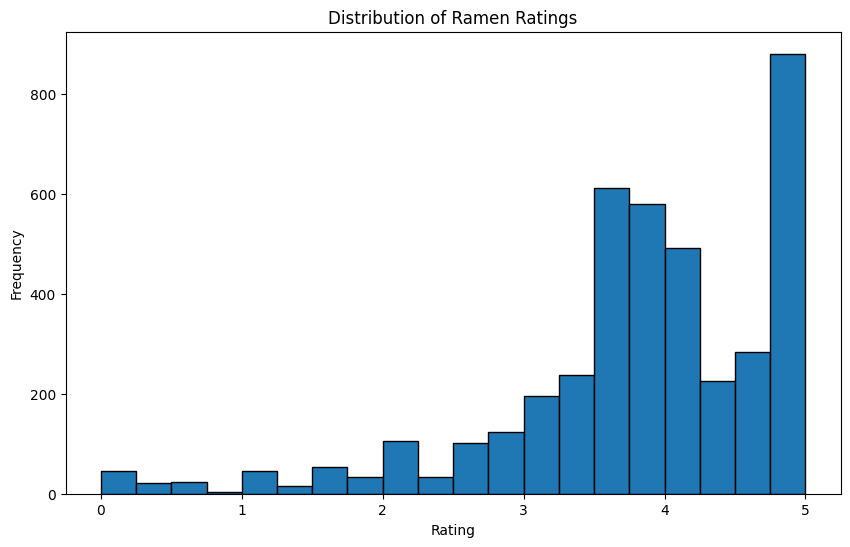

In [196]:
# Plot a histogram to visualize the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Stars'], bins=20, edgecolor='black')
plt.title('Distribution of Ramen Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [126]:
df["Stars"].describe()

count    4113.000000
mean        3.734780
std         1.043151
min         0.000000
25%         3.250000
50%         3.750000
75%         4.500000
max         5.000000
Name: Stars, dtype: float64

The boxplot and associated descriptive stats show that most ratings in this dataset range between 3.25 and 4.5. The majority of the ratings are clustered towards the higher end, with a significant peak at 5. This indicates that most reviewers are giving very high ratings. There are relatively few ratings at the lower end (0-2). This distribution suggests that people are more likely to leave positive reviews rather than expressing extreme opinions on both ends. 

Let's see who these top 20 most and least reviewed brands are and how many reviews they each received. 

#### c. Who are the top and bottom brands in terms of numbers of reviews received?

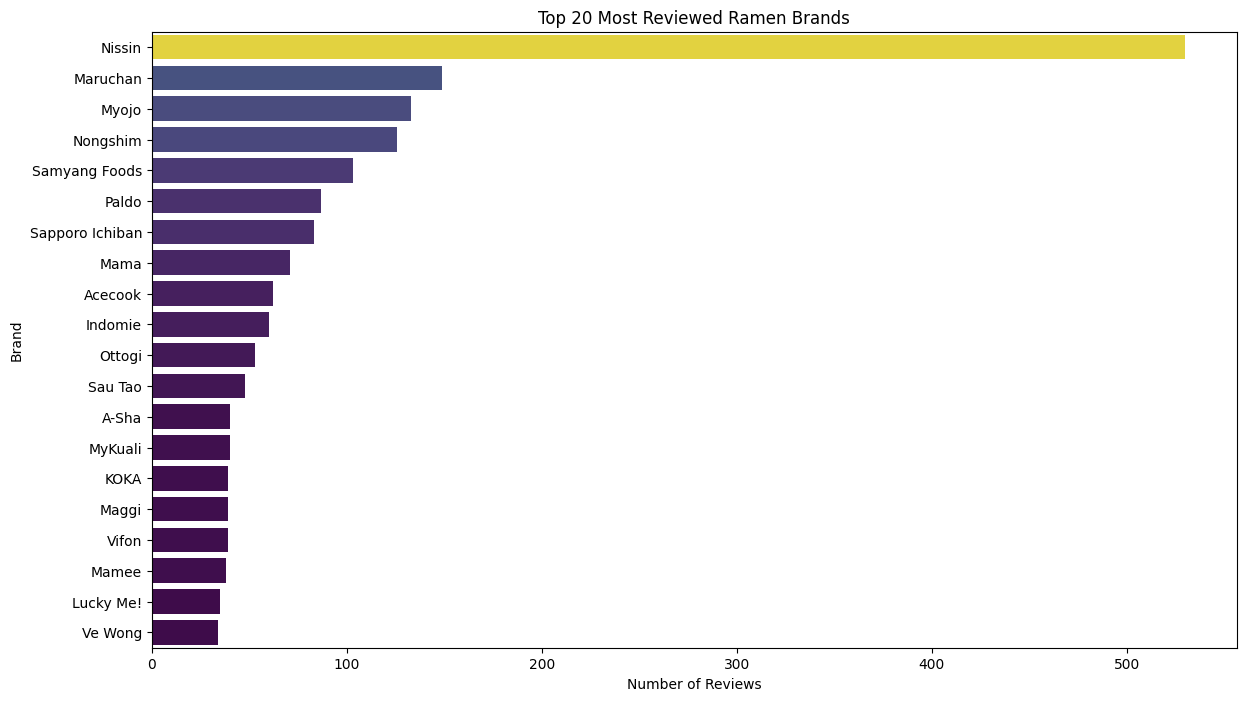

In [112]:
# Plot the top 20 most reviewed brands
plt.figure(figsize=(14, 8))
sns.barplot(x=brand_review_counts.head(20).values, y=brand_review_counts.head(20).index, palette='viridis', hue = brand_review_counts.head(20), legend=False)
plt.title('Top 20 Most Reviewed Ramen Brands')
plt.xlabel('Number of Reviews')
plt.ylabel('Brand')
plt.show()

In [186]:
brand_review_counts

Brand
Nissin           530
Maruchan         149
Myojo            133
Nongshim         126
Samyang Foods    103
                ... 
Baman              1
Springlife         1
Right Foods        1
Daddy              1
Nan Jie Cun        1
Name: count, Length: 580, dtype: int64

Nissan is by far the most reviewed brand in this dataset.  Several brands have only been reviewed once.  Let's see just how many brands have only been reviewed once and get an idea of the distribution of number of reviews by brand for the lowest number of reviews (10 or less) and for all the most reviewed brands (above 10).

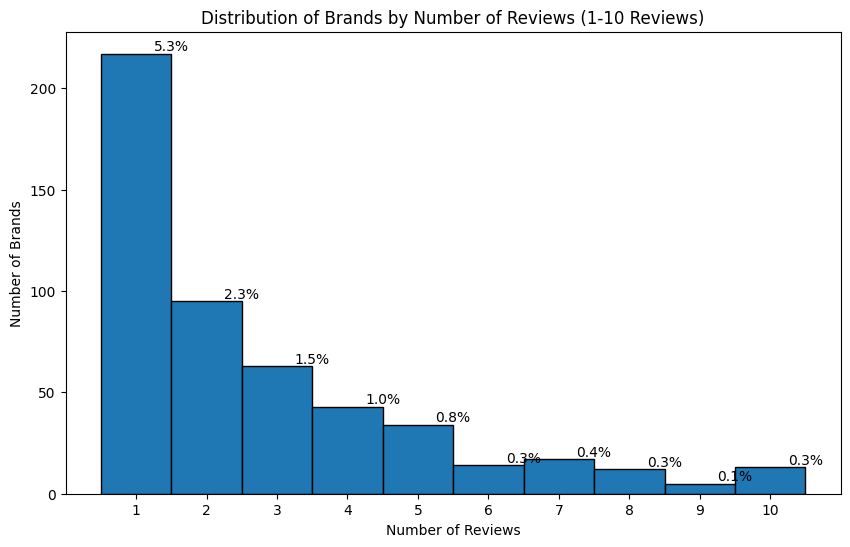

In [176]:
# Calculate the total number of reviews
total_reviews = brand_review_counts.sum()

# Histogram focusing on brands with 1-10 reviews
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(brand_review_counts, bins=range(1, 12), edgecolor='black', align='left')

# Calculate and annotate the percentage of total reviews for each bin
for count, bin_edge in zip(counts, bins[:-1]):
    percentage = (count / total_reviews) * 100
    plt.text(bin_edge + 0.5, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Brands by Number of Reviews (1-10 Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Brands')
plt.xticks(range(1, 11))
plt.show()



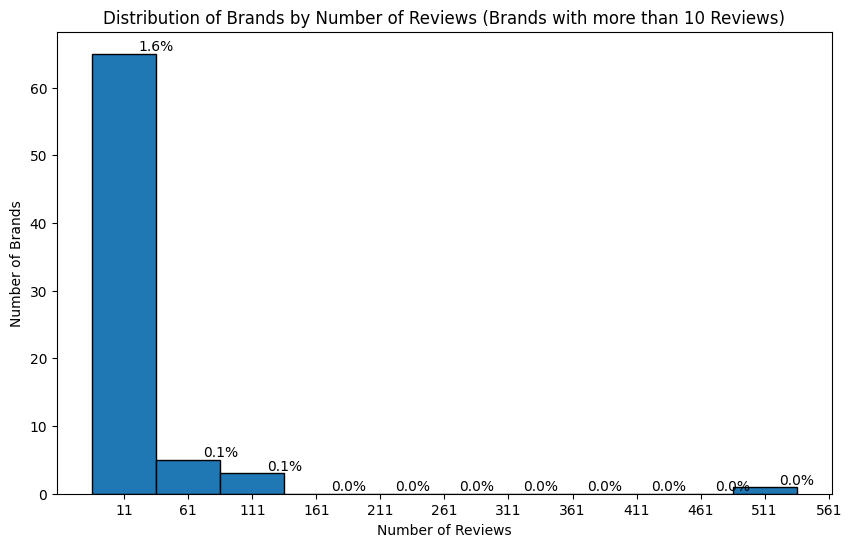

In [185]:
# Set bin size
bin_size = 50

# Filter review counts for brands with more than 10 reviews
filtered_review_counts = brand_review_counts[brand_review_counts > 10]

# Determine the max review count to set the bin range
max_review_count = filtered_review_counts.max()

# Create bins with equal size, starting from 11
bins = np.arange(11, max_review_count + bin_size, bin_size)

# Create the histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(filtered_review_counts, bins=bins, edgecolor='black', align='left')

# Annotate the percentage of total reviews for each bin
total_reviews = brand_review_counts.sum()
for count, bin_edge in zip(counts, bins[:-1]):
    percentage = (count / total_reviews) * 100
    plt.text(bin_edge + bin_size / 2, count, f'{percentage:.1f}%', ha='center', va='bottom')

# Set x-ticks to match the bins
plt.xticks(bins)

plt.title('Distribution of Brands by Number of Reviews (Brands with more than 10 Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Brands')
plt.show()



The majority of the reviews in the dataset are from Nissin.  The number of reviews for other brands drops off precipitously after Nissin's 530 reviews to just 149 reviews for 2nd most reviewed brand in this dataset, Maruchan. Furthermore, 5.3% of 580 brands (or over 30 brands) have only 1 review each.  This is therefore not a very representative dataset to learn more about these brands.

#### d. What brands have the highest ratings?

**To Calculate the Average Number of Reviews Excluding Outliers**
- Calculate the Number of Reviews per Brand: <br>
    Count the number of reviews each brand has.

- Identify and Exclude Outliers: <br>
    Use the Interquartile Range (IQR) method to identify and exclude outliers from the number of reviews.

- Calculate the Average Number of Reviews: <br>
    Compute the average number of reviews after excluding the outliers.

- Filter Consistent High-Rated Brands Based on Review Count: <br>
    Filter the consistent high-rated brands to include only those with a number of reviews greater than or equal to this average.

In [193]:
# Step 1: Calculate the number of reviews per brand
brand_review_counts = df['Brand'].value_counts()

# Step 2: Identify and exclude outliers using the IQR method
Q1 = brand_review_counts.quantile(0.25)
Q3 = brand_review_counts.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as any count outside of 1.5*IQR from the Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_review_counts = brand_review_counts[(brand_review_counts >= lower_bound) & (brand_review_counts <= upper_bound)]

# Step 3: Calculate the average number of reviews after excluding outliers
average_reviews = filtered_review_counts.mean()

# Step 4: Calculate average rating and standard deviation for each brand
brand_stats = df.groupby('Brand')['Stars'].agg(['mean', 'std', 'count']).rename(columns={'mean': 'Average_Rating', 'std': 'Rating_StdDev', 'count': 'Review_Count'})

# Filter consistent high-rated brands and limit to those with average or more reviews
consistent_high_rated_brands = brand_stats[
    (brand_stats['Average_Rating'] >= 4) & 
    (brand_stats['Rating_StdDev'] <= 0.5) & 
    (brand_stats['Review_Count'] >= average_reviews)
]

# Sort the results to see the highest rated, most consistent brands first
consistent_high_rated_brands = consistent_high_rated_brands.sort_values(by='Average_Rating', ascending=False)

# Display the results
print(f"Average number of reviews (excluding outliers): {average_reviews:.2f}")
print("Consistent high-rated brands with at least the average number of reviews:")

# Showing the top ten most consistently highly rated brands
print(consistent_high_rated_brands.head(10))



Average number of reviews (excluding outliers): 2.77
Consistent high-rated brands with at least the average number of reviews:
                 Average_Rating  Rating_StdDev  Review_Count
Brand                                                       
Best Wok               5.000000       0.000000             6
Hakubaku               5.000000       0.000000             5
Kubota                 5.000000       0.000000             3
Kung Fu Noodles        5.000000       0.000000             3
Little Couples         5.000000       0.000000             3
MyOri                  5.000000       0.000000             5
Red Chef               5.000000       0.000000             8
Prima                  5.000000       0.000000             4
Seven & I              5.000000       0.000000             3
Prima Taste            4.961538       0.138675            13


The brands listed above are the top ten that consistently receive high ratings with both high ratings and a low standard deviation for the ratings column.  But there are many brands that fit this categorisation rather than a few dominant brands.

#### e. Are the most reviewed brands more likely to have positive ratings?

In [160]:
# Calculate the number of reviews for each brand
brand_review_counts = df['Brand'].value_counts()

# Calculate the average rating for each brand
brand_avg_ratings = df.groupby('Brand')['Stars'].mean()

# Combine the two into a single DataFrame
brand_stats = pd.DataFrame({'Review_Count': brand_review_counts, 'Average_Rating': brand_avg_ratings})

# Display the top 10 most reviewed brands
print(brand_stats.sort_values(by='Review_Count', ascending=False).head(10))

                 Review_Count  Average_Rating
Brand                                        
Nissin                    530        3.879953
Maruchan                  149        3.663591
Myojo                     133        3.909774
Nongshim                  126        4.039683
Samyang Foods             103        4.097087
Paldo                      87        4.043103
Sapporo Ichiban            83        3.737952
Mama                       71        3.628873
Acecook                    62        3.133065
Indomie                    60        4.016667


In [161]:
# Split the DataFrame into most reviewed (top 20%) and less reviewed (bottom 80%)
threshold = brand_stats['Review_Count'].quantile(0.8)
most_reviewed_brands = brand_stats[brand_stats['Review_Count'] > threshold]
less_reviewed_brands = brand_stats[brand_stats['Review_Count'] <= threshold]

# Calculate the average rating for both groups
avg_rating_most_reviewed = most_reviewed_brands['Average_Rating'].mean()
avg_rating_less_reviewed = less_reviewed_brands['Average_Rating'].mean()

print(f"Average Rating of Most Reviewed Brands: {avg_rating_most_reviewed}")
print(f"Average Rating of Less Reviewed Brands: {avg_rating_less_reviewed}")

Average Rating of Most Reviewed Brands: 3.713319507444828
Average Rating of Less Reviewed Brands: 3.5580597281831188


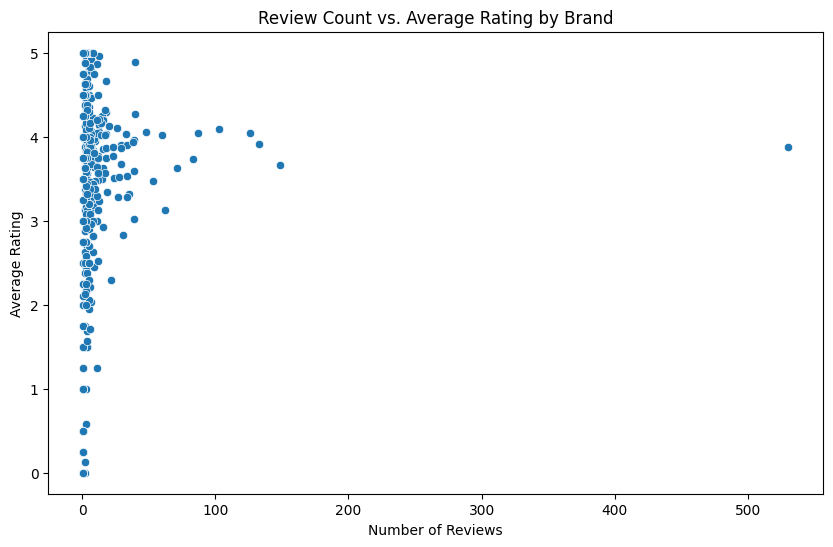

In [162]:
# Scatter plot of review count vs. average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review_Count', y='Average_Rating', data=brand_stats)
plt.title('Review Count vs. Average Rating by Brand')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.show()

1) Most brands have a relatively low number of reviews (below 100). This concentration of points on the left side of the plot indicates that the majority of brands in the dataset have a smaller number of reviews, which is something we might like to investigate further.
2) For brands with fewer reviews, the average ratings vary widely, from very low (close to 0) to very high (close to 5). This suggests that brands with fewer reviews can have more variable ratings.
3) There is a noticeable outlier on the far right of the plot, representing a brand with over 500 reviews. This brand has an average rating of around 4, indicating that it is both popular and well-rated.
4) The scatter plot does not show a strong linear correlation between the number of reviews and the average rating. Brands with a high number of reviews do not necessarily have higher ratings, and those with fewer reviews can have a wide range of average ratings.

#### f. Violin Plot of Ramen Ratings by Style

To visualise the distribution and density of the ratings for each style, let's create a violin plot. That will help us to answer the question, "Does the style of ramen (e.g., cup, bowl, pack) affect its rating?"

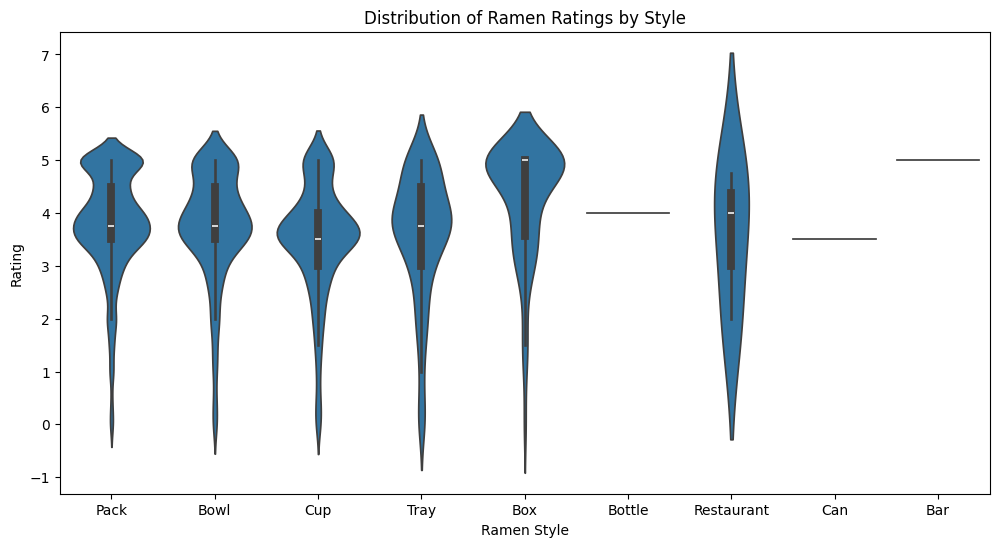

In [188]:
# Create a violin plot to show the distribution of ratings by ramen style
plt.figure(figsize=(12, 6))
sns.violinplot(x='Style', y='Stars', data=df)
plt.title('Distribution of Ramen Ratings by Style')
plt.xlabel('Ramen Style')
plt.ylabel('Rating')
plt.show()


1) These styles have a high density of ratings around 4 to 5, suggesting that they are generally well-received and consistently rated.
2) The restaurant style shows more variability in ratings, indicating that it might be more hit-or-miss depending on the specific product or review.
3) For styles like Bottle, Can, and Bar, the lack of a visible distribution suggests that there might not be enough data to draw strong conclusions but Box-style ramen appears to be consistently rated highly.

#### b. Box Plot of Ratings per Brand

To Investigate how different brands compare in terms of their average ratings, we can calculate the Average rating for each brand and visualise this ratings distribution for each brand. 

Let's first group the data by the Brand column and calculate the mean of the Stars (ratings) column for each brand.

In [141]:
# Calculate the average rating for each brand
brand_avg_ratings = df.groupby('Brand')['Stars'].mean().sort_values(ascending=False)

# Average rating for all brands
print("Average rating for all brands = ", round(brand_avg_ratings.mean(), 2));  


Average rating for all brands =  3.59


## Conclusion:

In this analysis of the Ramen Ratings dataset, we set out to explore various questions and hypotheses related to the quality, consistency, and popularity of ramen brands across different countries and styles.

#### Key Findings:

1. **Which country produces the highest-rated ramen?**
   - Japan dominated in terms of the number of top-rated ramen products, confirming the hypothesis that Japanese brands are generally highly regarded. However, the dataset also showed that France had the highest average ratings, which was surprising. This result is likely due to the very small sample size of reviews from France, suggesting that countries with fewer reviews might show inflated averages that are not fully representative.

2. **Do the ratings scores vary widely in this dataset?**
   - Initially, we hypothesized that people might leave reviews when they have extreme opinions, either very positive or very negative, leading to a bimodal distribution of ratings. However, the histogram of the ratings distribution showed that this is not the case. Instead, the distribution is primarily positive, with the majority of ratings clustering around 4 and 5, and a significant peak at 5. This suggests that reviewers are generally satisfied with the products they review, and extreme negative opinions are less common.

3. **Who are the most and least reviewed brands?**
   - The hypothesis that a few brands dominate the review landscape was supported by the data. Popular brands like "Nissin" and "Samyang" had a disproportionately high number of reviews, while many other brands had only a few. This uneven distribution reflects the strong market presence of these popular brands.

4. **Which brands most consistently receive high average ratings?**
   - Several brands were identified as consistently high-rated, with both high average ratings and low standard deviations, confirming that some brands deliver quality that resonates well with consumers.

5. **Do the most reviewed brands also have higher ratings?**
   - The analysis showed that having more reviews does not necessarily correlate with higher average ratings. While some highly reviewed brands did have high ratings, others did not, indicating that review count alone is not a reliable indicator of product quality.

6. **Does the style of ramen (e.g., cup, bowl, pack) affect its rating?**
   - Traditional styles such as packs and bowls generally performed well, while less common formats like bottles and cans received lower ratings. This suggests a consumer preference for traditional ramen styles, aligning with our initial hypothesis.

#### Important Considerations:
- **Dataset Representation:** One significant limitation of this analysis is the uneven representation of brands in the dataset. Some brands were reviewed many times, while others had only a handful of reviews. This uneven representation may skew the results, particularly for countries or brands with fewer reviews, leading to potentially misleading conclusions about average ratings.

- **Positive Skew in Ratings:** The ratings are primarily positive, with most reviews clustered around the higher end of the scale. This suggests that the dataset reflects a generally favorable reception of ramen products, rather than an equal distribution of extreme opinions.

#### Possibilities for Future Areas of Analysis given Additional Data:
 
1. **Consumer Preferences:** Further exploration could focus on regional differences in consumer preferences, examining how different styles or flavors are received in various markets.

2. **Time Series Analysis:** Analyzing changes in ratings over time could provide insights into how consumer tastes and product quality have evolved.

3. **Ingredient and Flavor Analysis:** Investigating how specific ingredients or flavor profiles correlate with ratings could offer valuable insights for product development.

4. **Market Trends:** Examining the introduction of new ramen products by year could help identify emerging trends in the ramen industry.

Overall, our analysis provided some insights into the ramen market and confirmed several hypotheses, though the strong positive skew in ratings should be noted as a significant factor in interpreting the results. Further exploration and more balanced data could help refine these findings and offer a more a less skewed understanding of consumer preferences in the ramen industry.